In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

c:\Users\mamai\anaconda3\Lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [2]:
X,y= mnist.data, mnist.target

In [3]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [4]:
X.shape

(70000, 784)

In [5]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

In [6]:
y.shape

(70000,)

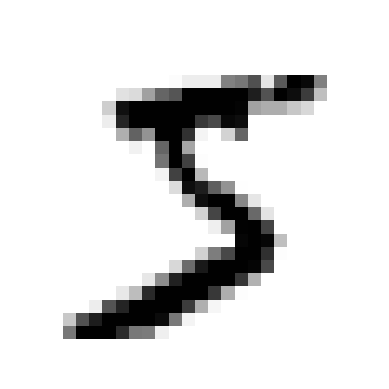

In [7]:
# a digit in the dataset
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]
plot_digit(some_digit)
plt.show()

In [8]:
y[0]

'5'

Training The Dataset

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:],y[:60000], y[60000:]

Binary Classifier (5 and not 5)

In [10]:
#Creating target vectors
y_train_5=(y_train=='5')
y_test_5=(y_test=='5')

SGD classifier

In [11]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)


SGDClassifier(random_state=42)

In [12]:
sgd_clf.predict([some_digit])

array([ True])

Perfomance Measures

1. Measuring Accuracy Using Cross-Validation

In [13]:
#k fold classification, where k==3
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train,y_train_5,cv=3,scoring="accuracy")

array([0.95035, 0.96035, 0.9604 ])

In [14]:
# Dummy Classifier

from sklearn.dummy import DummyClassifier

dummy_clf=DummyClassifier()
dummy_clf.fit(X_train,y_train_5)
print (any(dummy_clf.predict(X_train)))

False


In [15]:
# Dummy Model Accuracy
cross_val_score(dummy_clf, X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90965, 0.90965, 0.90965])

2. Confusion Matrices

In [16]:
#predictions made on each test fold
from sklearn.model_selection import cross_val_predict

y_train_pred=cross_val_predict(sgd_clf, X_train,y_train_5,cv=3)

In [17]:
# Confusion matrix

from sklearn.metrics import confusion_matrix

cm=confusion_matrix(y_train_5, y_train_pred)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

3. Presicion and Recall

In [18]:
from sklearn.metrics import precision_score, recall_score

precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [19]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [20]:
# Harmonic mean of precision and recall (F1-score) 

from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7325171197343846

4. Precision and Recall Trade-Off

In [21]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([2164.22030239])

In [22]:
threshold=0

In [23]:
y_some_digit_pred = (y_scores > threshold)

In [24]:
threshold=3000

In [25]:
y_some_digit_pred = (y_scores > threshold)

In [26]:
y_some_digit_pred

array([False])

        How to decide what threshold to use?

In [27]:
"""
First, use the cross_val_predict() function to get the scores of all instances in thetraining set, 
but this time specify that you want to return decision scoresinstead of predictions
"""

'\nFirst, use the cross_val_predict() function to get the scores of all instances in thetraining set, \nbut this time specify that you want to return decision scoresinstead of predictions\n'

In [28]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3,method="decision_function")

In [29]:
#  using the precision_recall_curve() function to compute precision and recall for all possible thresholds
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [ ]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall",linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")
plt.show()